# Explore GEOS-Chem input data repository in S3

Registry of Open Data on AWS: https://registry.opendata.aws/geoschem-input-data/

Currently in [Requester Pays Buckets](https://docs.aws.amazon.com/AmazonS3/latest/dev/RequesterPaysBuckets.html). No charge for downloading to EC2 in the same region but does incur data egress charge if downloaded to local machines.

In [1]:
# top-level directory
!aws s3 ls --request-payer=requester s3://gcgrid/

                           PRE CHEM_INPUTS/
                           PRE GCHP/
                           PRE GEOSCHEM_RESTARTS/
                           PRE GEOS_0.25x0.3125/
                           PRE GEOS_0.25x0.3125_CH/
                           PRE GEOS_0.25x0.3125_NA/
                           PRE GEOS_0.5x0.625_AS/
                           PRE GEOS_0.5x0.625_NA/
                           PRE GEOS_2x2.5/
                           PRE GEOS_4x5/
                           PRE GEOS_MEAN/
                           PRE GEOS_NATIVE/
                           PRE GEOS_c360/
                           PRE HEMCO/
                           PRE gcap/
2018-03-07 19:18:41       3908 README


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

np.seterr(invalid='ignore'); # disable a warning from matplotlib + cartopy

## Meteorological data products 
http://wiki.seas.harvard.edu/geos-chem/index.php/Overview_of_GMAO_met_data_products

### Global 2x2.5 resolution

In [3]:
!aws s3 ls --request-payer=requester s3://gcgrid/GEOS_2x2.5/GEOS_FP/

                           PRE 2011/
                           PRE 2012/
                           PRE 2013/
                           PRE 2014/
                           PRE 2015/
                           PRE 2016/
                           PRE 2017/


In [4]:
!aws s3 cp --request-payer=requester \
s3://gcgrid/GEOS_2x2.5/GEOS_FP/2016/07/GEOSFP.20160701.I3.2x25.nc ./

download: s3://gcgrid/GEOS_2x2.5/GEOS_FP/2016/07/GEOSFP.20160701.I3.2x25.nc to ./GEOSFP.20160701.I3.2x25.nc


In [5]:
ds_met = xr.open_dataset('./GEOSFP.20160701.I3.2x25.nc')
ds_met

<xarray.Dataset>
Dimensions:  (lat: 91, lev: 72, lon: 144, time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2016-07-01 2016-07-01T03:00:00 ...
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 ...
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 -170.0 -167.5 -165.0 ...
Data variables:
    PS       (time, lat, lon) float32 ...
    PV       (time, lev, lat, lon) float32 ...
    QV       (time, lev, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
Attributes:
    Title:                 GEOS-FP instantaneous 3-hour parameters (I3), proc...
    Contact:               GEOS-Chem Support Team (geos-chem-support@as.harva...
    References:            www.geos-chem.org; wiki.geos-chem.org
    Filename:              GEOSFP.20160701.I3.2x25.nc
    History:               File generated on: 2016/08/04 09:56:57 GMT-0300
    ProductionDateTime:    File generated on: 

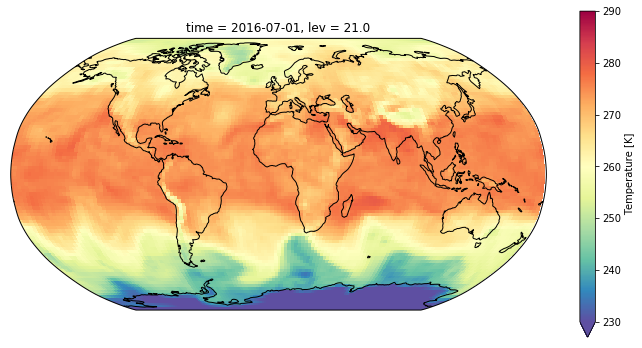

In [6]:
fig = plt.figure(figsize=[12, 6])
ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

(ds_met['T'].isel(time=0, lev=20)
 .plot.imshow(vmax=290, vmin=230,ax=ax, transform=ccrs.PlateCarree(), cmap='Spectral_r')
)

### Native 0.25 x 0.3125 resolution

In [7]:
!aws s3 ls --request-payer=requester s3://gcgrid/GEOS_0.25x0.3125/GEOS_FP/

                           PRE 2011/
                           PRE 2015/
                           PRE 2016/
                           PRE 2017/


In [8]:
!aws s3 cp --request-payer=requester \
s3://gcgrid/GEOS_0.25x0.3125/GEOS_FP/2016/07/GEOSFP.20160701.I3.025x03125.nc ./

download: s3://gcgrid/GEOS_0.25x0.3125/GEOS_FP/2016/07/GEOSFP.20160701.I3.025x03125.nc to ./GEOSFP.20160701.I3.025x03125.nc


In [9]:
ds_met_hi = xr.open_dataset('./GEOSFP.20160701.I3.025x03125.nc')
ds_met_hi

<xarray.Dataset>
Dimensions:  (lat: 721, lev: 72, lon: 1152, time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2016-07-01 2016-07-01T03:00:00 ...
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -89.9375 -89.75 -89.5 -89.25 -89.0 -88.75 -88.5 ...
  * lon      (lon) float32 -180.0 -179.6875 -179.375 -179.0625 -178.75 ...
Data variables:
    PS       (time, lat, lon) float32 ...
    PV       (time, lev, lat, lon) float32 ...
    QV       (time, lev, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
Attributes:
    Title:                 GEOS-FP instantaneous 3-hour parameters (I3), proc...
    Contact:               GEOS-Chem Support Team (geos-chem-support@as.harva...
    References:            www.geos-chem.org; wiki.geos-chem.org
    Filename:              GEOSFP.20160701.I3.025x03125.nc
    History:               File generated on: 2017/07/20 19:39:13 GMT-0300
    ProductionDateTime:    File generated on

In [44]:
# increase default fontsize (mainly for colorbar labels)
plt.rcParams['font.size'] = 16

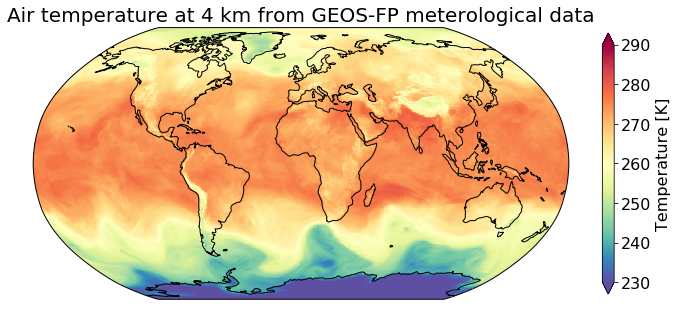

In [45]:
fig = plt.figure(figsize=[12, 6])
ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()

(ds_met_hi['T'].isel(time=0, lev=20)
 .plot.imshow(vmax=290, vmin=230, ax=ax, transform=ccrs.PlateCarree(), 
              cmap='Spectral_r', extend='both', cbar_kwargs={'shrink': 0.8})
)

plt.title('Air temperature at 4 km from GEOS-FP meterological data', fontsize=20)


fig.savefig('GEOSFP_Temp.png', dpi=300)

## Emission inventories

http://wiki.seas.harvard.edu/geos-chem/index.php/HEMCO_data_directories

In [15]:
!aws s3 ls --request-payer=requester s3://gcgrid/HEMCO/

                           PRE ACET/
                           PRE AEIC/
                           PRE ALD2/
                           PRE APEI/
                           PRE ARCTAS_SHIP/
                           PRE AnnualScalar/
                           PRE BCOC_BOND/
                           PRE BCOC_COOKE/
                           PRE BIOBURN/
                           PRE BIOFUEL/
                           PRE BRAVO/
                           PRE BROMINE/
                           PRE C2H6_2010/
                           PRE CAC/
                           PRE CEDS/
                           PRE CH3I/
                           PRE CH4/
                           PRE CHLA/
                           PRE CO2/
                           PRE CORBETT_SHIP/
                           PRE COUNTRY_ID/
                           PRE DICE_Africa/
                           PRE DMS/
                           PRE DUST_DEAD/
                           PRE DUST_GINOUX/
     

In [16]:
!aws s3 ls --request-payer=requester s3://gcgrid/HEMCO/CEDS/

                           PRE v2018-04/
                           PRE v2018-08/


In [17]:
!aws s3 ls --request-payer=requester s3://gcgrid/HEMCO/CEDS/v2018-08/2014/

2018-12-03 14:06:40   14468324 ALD2-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:40   15161078 ALK4_butanes-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:40   21458244 ALK4_hexanes-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:41   15147762 ALK4_pentanes-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:41   20467339 BC-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:41   20927679 BENZ-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:41   20099267 C2H2-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:42   18883095 C2H4-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:43   14807530 C2H6-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:43   15118921 C3H8-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:43   14686727 CH2O-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:43   23646732 CH4-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:44   20790098 CO-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:44   20634001 CO2-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:44   12038596 EOH-em-anthro_CMIP_CEDS_2014.nc
2018-12-03 14:06:44   

In [22]:
!aws s3 cp --request-payer=requester \
    s3://gcgrid/HEMCO/CEDS/v2018-08/2014/NO-em-anthro_CMIP_CEDS_2014.nc ./

download: s3://gcgrid/HEMCO/CEDS/v2018-08/2014/NO-em-anthro_CMIP_CEDS_2014.nc to ./NO-em-anthro_CMIP_CEDS_2014.nc


In [23]:
ds_emis = xr.open_dataset("./NO-em-anthro_CMIP_CEDS_2014.nc")

In [24]:
ds_emis

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-02-01 2014-03-01 ...
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 -177.8 -177.2 -176.8 ...
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
Data variables:
    NO_agr   (time, lat, lon) float32 ...
    NO_ene   (time, lat, lon) float32 ...
    NO_ind   (time, lat, lon) float32 ...
    NO_rco   (time, lat, lon) float32 ...
    NO_shp   (time, lat, lon) float32 ...
    NO_slv   (time, lat, lon) float32 ...
    NO_tra   (time, lat, lon) float32 ...
    NO_wst   (time, lat, lon) float32 ...
Attributes:
    CDI:                         Climate Data Interface version 1.9.4 (http:/...
    history:                     Tue Aug 21 12:09:00 2018: cdo selyear,2014 /...
    source:                      CEDS-2017-05-18: Community Emissions Data Sy...
    institution:                 Pacific Northwest National Laboratory - Join...
    Co

In [25]:
ds_emis['NO_agr'].attrs

OrderedDict([('long_name',
              'NO anthropogenic emissions from non-combustion agricultural sector'),
             ('units', 'kg m-2 s-1'),
             ('cell_methods', 'time: mean sector: mean')])

In [33]:
dr_emis_total = sum(ds_emis.data_vars.values())
dr_emis_total.attrs['long_name'] = 'Emission rate'
dr_emis_total.attrs['units'] = 'kg m-2 s-1'

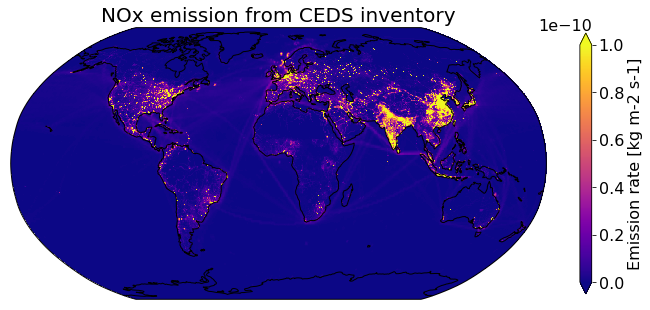

In [46]:
fig = plt.figure(figsize=[12, 6])
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

(
dr_emis_total.isel(time=0).
plot.imshow(ax=ax, vmin=0, vmax=1e-10, transform=ccrs.PlateCarree(),
            cmap='plasma', extend='both', cbar_kwargs={'shrink': 0.8})
)

plt.title('NOx emission from CEDS inventory', fontsize=20)
fig.savefig('HEMCO_CEDS_NO.png', dpi=300)

## Chemical initial conditions ("restart file")

In [36]:
!aws s3 ls --request-payer=requester s3://gcgrid/GEOSCHEM_RESTARTS/

                           PRE v2015-09/
                           PRE v2016-07/
                           PRE v2018-11/


In [37]:
!aws s3 ls --request-payer=requester s3://gcgrid/GEOSCHEM_RESTARTS/v2018-11/

2018-12-03 10:36:17       3122 README
2018-12-03 10:36:17       2334 UpdateNC.py
2018-12-03 10:36:18    6344318 initial_GEOSChem_rst.025x03125_CH4_na.nc
2018-12-03 10:36:18  378308453 initial_GEOSChem_rst.025x03125_tropchem_ch.nc
2018-12-03 10:36:36  503135880 initial_GEOSChem_rst.025x03125_tropchem_na.nc
2018-12-03 10:36:49    2892836 initial_GEOSChem_rst.05x0625_CH4_na.nc
2018-12-03 10:36:49  208872773 initial_GEOSChem_rst.05x0625_tropchem_as.nc
2018-12-03 10:36:59  208872773 initial_GEOSChem_rst.05x0625_tropchem_ch.nc
2018-12-03 10:36:59  210572404 initial_GEOSChem_rst.05x0625_tropchem_na.nc
2018-12-03 10:37:09    3437840 initial_GEOSChem_rst.05x0666_CH4_na.nc
2018-12-03 10:37:09   10822192 initial_GEOSChem_rst.05x0666_Hg_na.nc
2018-12-03 10:37:09  205769412 initial_GEOSChem_rst.05x0666_tropchem_ch.nc
2018-12-03 10:37:10  233613036 initial_GEOSChem_rst.05x0666_tropchem_na.nc
2018-12-03 10:37:20    1918802 initial_GEOSChem_rst.2x25_CH4.nc
2018-12-03 10:37:20    1500985 initial_GEOSCh

In [38]:
!aws s3 cp --request-payer=requester \
s3://gcgrid/GEOSCHEM_RESTARTS/v2018-11/initial_GEOSChem_rst.2x25_tropchem.nc ./

download: s3://gcgrid/GEOSCHEM_RESTARTS/v2018-11/initial_GEOSChem_rst.2x25_tropchem.nc to ./initial_GEOSChem_rst.2x25_tropchem.nc


In [39]:
ds_ini = xr.open_dataset('./initial_GEOSChem_rst.2x25_tropchem.nc')

In [40]:
ds_ini['SpeciesRst_O3']

<xarray.DataArray 'SpeciesRst_O3' (time: 1, lev: 47, lat: 91, lon: 144)>
[615888 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 ...
  * lev      (lev) float32 0.9924996 0.9774562 0.9623704 0.94728535 ...
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 -170.0 -167.5 -165.0 ...
  * time     (time) datetime64[ns] 2013-07-01
Attributes:
    long_name:  O3 tracer
    units:      mol/mol

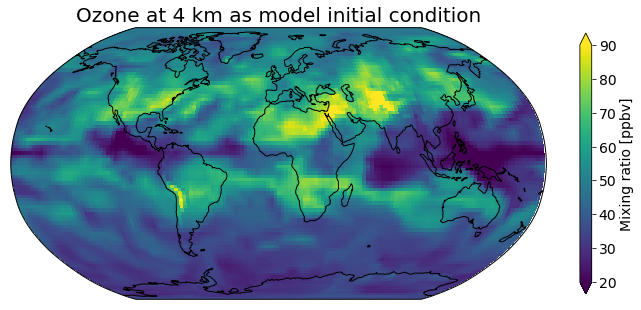

In [43]:
fig = plt.figure(figsize=[12, 6])

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

dr_ini = ds_ini['SpeciesRst_O3']*1e9
dr_ini.attrs['long_name'] = 'Mixing ratio'
dr_ini.attrs['units'] = 'ppbv'

(
dr_ini.isel(time=0, lev=20).
plot.imshow(ax=ax, vmin=20, vmax=90, transform=ccrs.PlateCarree(),
            extend='both', cbar_kwargs={'shrink': 0.8})
)

plt.title('Ozone at 4 km as model initial condition', fontsize=20)
fig.savefig('Restart_O3.png', dpi=300)